## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.2 MB/s eta 0:00:00


## 데이터 로드
* parquet 형식 로드를 위한 라이브러리가 설치되어 있어야 합니다.

In [7]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [8]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
 8   TotalPrice   541909 non-null  float64 
dtypes: category(5), float32(1), float64(2), int32(1)
memory usage: 19.3 MB


## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. 이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

* pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.
* 참고 : 슬라이드에서 중심극한정리를 찾아보세요.

In [27]:
#표본 추출
sample_size = 1000   # 각 표본의 크기

sample = df.sample(n = sample_size)

In [31]:

sample['TotalPrice'].describe(), df['TotalPrice'].describe()

(count    1000.000000
 mean       13.314450
 std        74.366587
 min     -2118.740000
 25%         3.300000
 50%         9.900000
 75%        17.295000
 max       408.000000
 Name: TotalPrice, dtype: float64,
 count    541909.000000
 mean         17.987795
 std         378.810824
 min     -168469.600000
 25%           3.400000
 50%           9.750000
 75%          17.400000
 max      168469.600000
 Name: TotalPrice, dtype: float64)

전체 데이터세트와 샘플 간의 'TotalPrice' 평균 차이는 약 4.67 <br/>
전체 데이터세트와 샘플 간의 'TotalPrice' 표준편차 차이는 약 304.44
<br/>
샘플의 표준편차가 표본에 비해 크게 작은 것으로 보여져 outlier의 영향을 많이 받은 것으로 보여집니다.

## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

In [32]:
from scipy import stats


In [44]:
# 국가 별 totalprice describe
desc = df.groupby('Country')['TotalPrice'].describe()
sorted_desc = desc.sort_values(by='count').tail(2)
sorted_desc

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Germany,9495.0,23.348943,37.324826,-599.5,11.10,16.60,23.40,876.0
United Kingdom,495478.0,16.525065,394.839116,-168469.6,3.29,8.29,16.63,168469.6


In [57]:
# Germany에 해당하는 데이터 추출
Germany = sorted_desc.loc['Germany']

# United Kingdom에 해당하는 데이터 추출
UK = sorted_desc.loc['United Kingdom']

In [58]:
# 난수 생성기의 시드 값을 설정.
np.random.seed(0)

# 독일과 영국 데이터의 평균과 표준편차를 기반으로 정규 분포된 난수를 생성.
germany_sample = np.random.normal(loc=Germany['mean'], scale=Germany['std'], size=int(Germany['count']))
uk_sample = np.random.normal(loc=UK['mean'], scale=UK['std'], size=int(UK['count']))

# 독립표본 t-검정을 수행. 두 집단의 분산이 다르다고 가정하기 때문에 equal_var=False를 설정.
t_stat, p_value = stats.ttest_ind(germany_sample, uk_sample, equal_var=False)

# t-통계량과 p-값을 반환.
t_stat, p_value

(7.259755644695, 3.909453274998071e-13)

p-값이 0에 가까우며 0.05보다 낮으므로 귀무가설을 기각, 통계적으로 유의미하여 독일과 영국의 평균 'TotalPrice'에는 유의미한 차이가 있는 것으로 보여집니다.

## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. 다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

* 참고 : [pandas.DataFrame.describe — pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
* 참고 : 슬라이드의 "기술 통계" 부분을 찾아보세요.

In [59]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

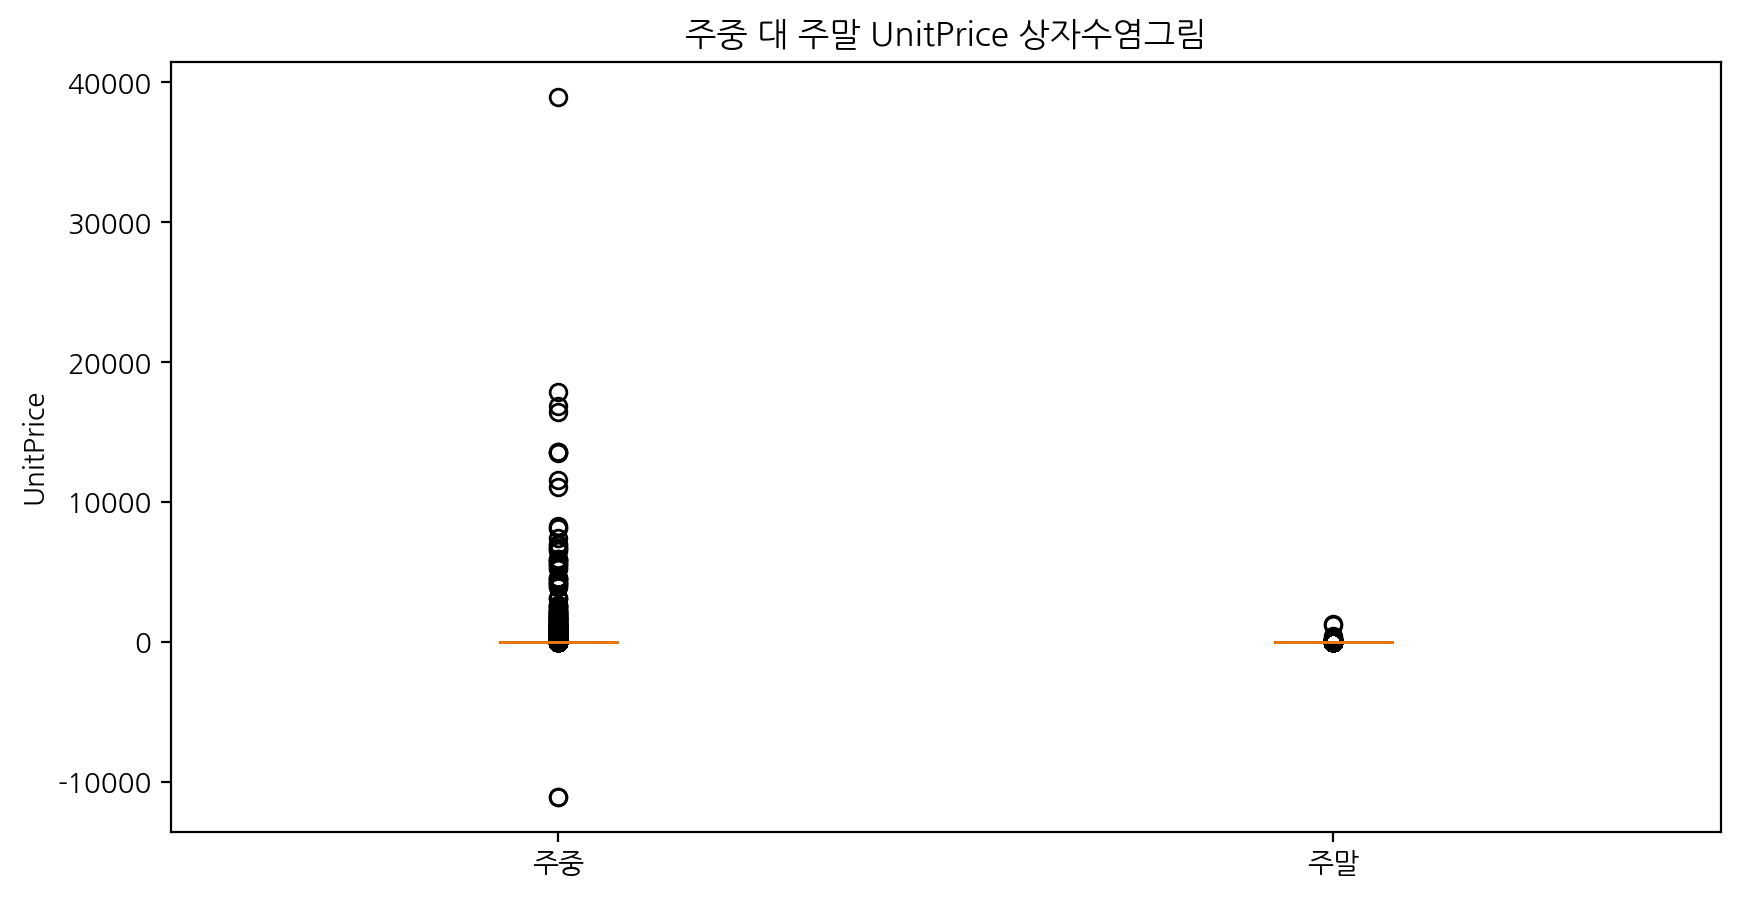

In [80]:
plt.figure(figsize=(10, 5))
plt.boxplot([df[df['WeekEnd'] == "주중"]['UnitPrice'], df[df['WeekEnd'] == "주말"]['UnitPrice']], labels=['주중', '주말'])
plt.title('주중 대 주말 UnitPrice 상자수염그림')
plt.ylabel('UnitPrice')
plt.show()

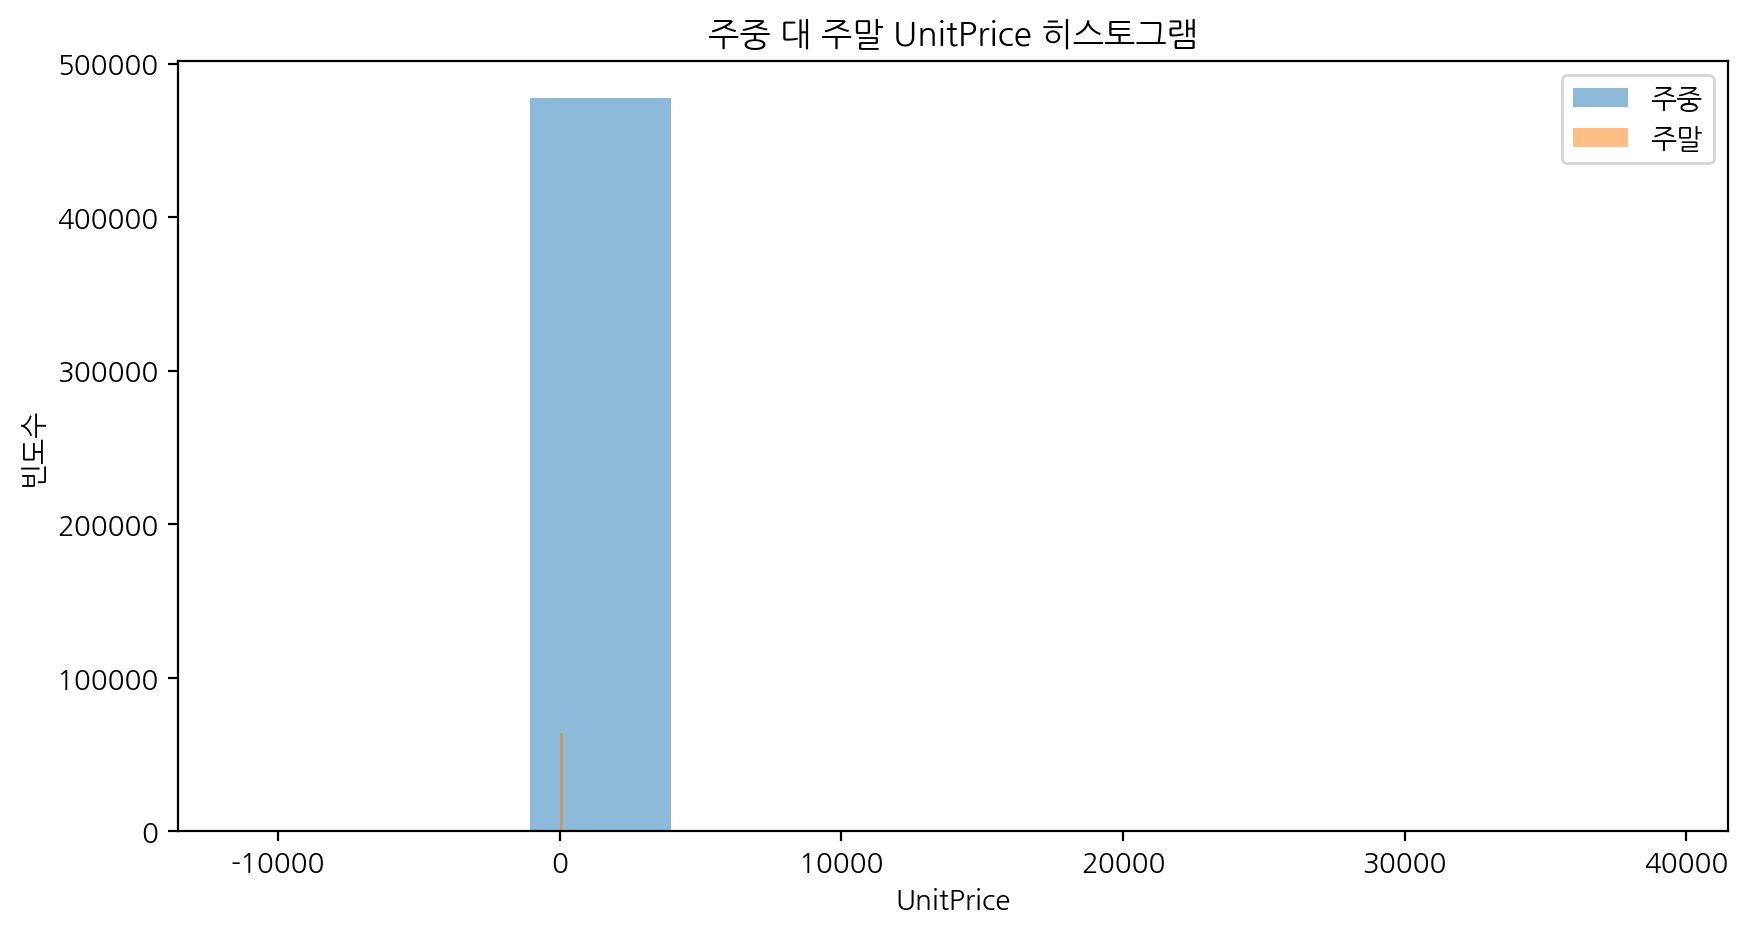

In [79]:
plt.figure(figsize=(10, 5))
plt.hist(df[df['WeekEnd'] == "주중"]['UnitPrice'], alpha=0.5, label='주중')
plt.hist(df[df['WeekEnd'] == "주말"]['UnitPrice'], alpha=0.5, label='주말')
plt.title('주중 대 주말 UnitPrice 히스토그램')
plt.xlabel('UnitPrice')
plt.ylabel('빈도수')
plt.legend()
plt.show()

In [71]:
weekday_descriptive_stats = weekday_data['UnitPrice'].describe()
weekend_descriptive_stats = weekend_data['UnitPrice'].describe()

weekday_descriptive_stats, weekend_descriptive_stats

(count    477534.000000
 mean          4.843425
 std         103.032058
 min      -11062.060000
 25%           1.250000
 50%           2.100000
 75%           4.130000
 max       38970.000000
 Name: UnitPrice, dtype: float64,
 count    64375.000000
 mean         2.887824
 std          7.959497
 min          0.000000
 25%          1.250000
 50%          1.850000
 75%          3.750000
 max       1236.750000
 Name: UnitPrice, dtype: float64)

## 미션4)  'TotalPrice'의 중간값이 특정 값과 다른지 검증하기 위해 비모수 검정 (예: 맨-휘트니 U-검정)을 사용하세요. 검증 결과에 대해 비즈니스 관점에서 분석해 주세요.

* 비모수 검정은 데이터가 정규 분포를 따르지 않거나, 정규 분포에 대한 가정을 할 수 없을 때 사용됩니다. 특히, 작은 표본 크기, 이상치의 존재, 순위나 순서와 같은 비정량적 데이터에 적합합니다. 또한, 두 그룹 간의 중앙값이나 분포의 형태가 다를 때 비모수 검정을 사용할 수 있습니다.

* 맨-휘트니 U-검정은 두 독립적인 표본 간에 중앙값의 차이를 비교하는 데 사용됩니다. 이 검정은 두 그룹의 데이터가 서로 독립적이며, 최소한 서열 척도로 측정되어야 합니다. 데이터의 분포 형태에 대한 가정이 필요 없으며, 크기가 다른 두 표본에 대해서도 사용할 수 있습니다. 이 검정은 데이터의 중앙값이 특정 값과 다른지 여부를 검증하는 데 유용합니다.

다음의 주어진 코드를 활용해 주세요.

```python
from scipy.stats import mannwhitneyu
# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
```

* 참고 : https://www.ibm.com/docs/ko/spss-statistics/beta?topic=tests-mann-whitney-u-test

In [69]:
from scipy.stats import mannwhitneyu

# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [75]:
# Mann-Whitney U-검정 수행
# 이탈한 고객과 이탈하지 않은 고객의 월별 요금 데이터 추출

TotalPrice_WeekDay = df[df['WeekEnd'] == "주중"]['TotalPrice']
TotalPrice_WeekEnd = df[df['WeekEnd'] == "주말"]['TotalPrice']
TotalPrice_WeekDay.isnull().sum(), TotalPrice_WeekEnd.isnull().sum()

(0, 0)

In [77]:
# Mann-Whitney U-검정 수행
# u_statistic, p_value

stats.mannwhitneyu(TotalPrice_WeekDay, TotalPrice_WeekEnd)

MannwhitneyuResult(statistic=17561927109.5, pvalue=0.0)

p 값은 0.0으로 귀무 가설을 기각, 주중과 주말 간에 'TotalPrice' 평균에 통계적으로 유의미한 차이가 있는 것으로 보여집니다.

## 미션5) UnitPrice 컬럼에 대한 95% 신뢰구간을 구하고  seaborn 으로 신뢰구간을 시각화 해주세요. 그리고 이 신뢰구간이 비즈니스 결정에 어떻게 활용될 수 있는지 설명하세요.

In [83]:
from scipy import stats
from scipy.stats import t

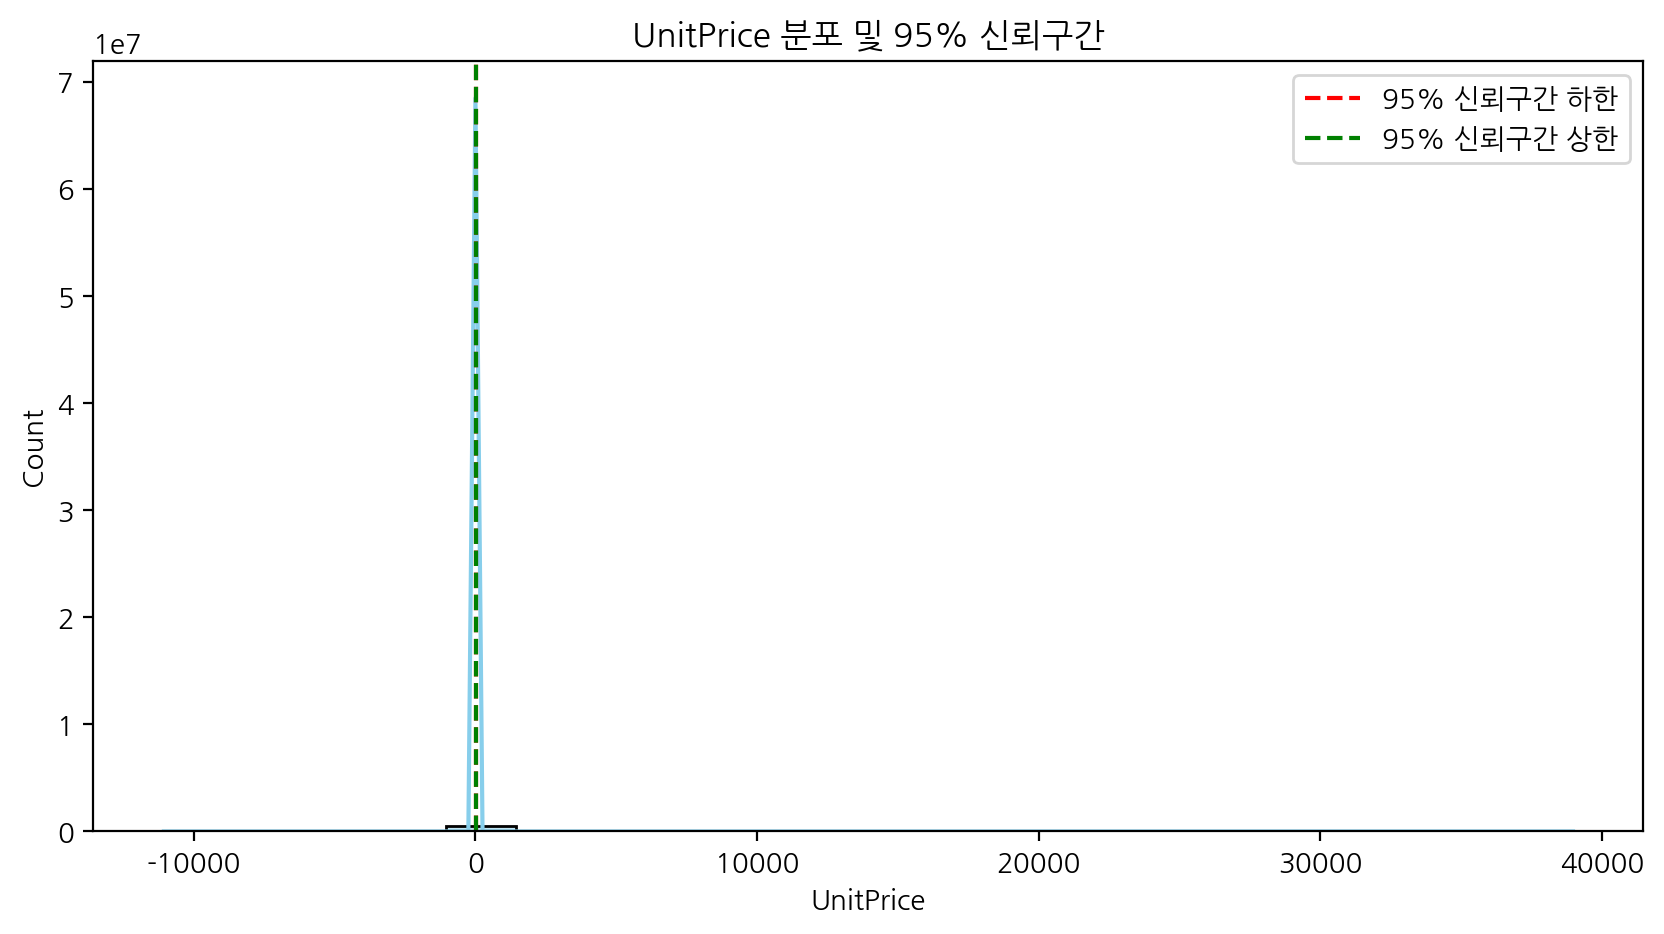

((4.353492734282087, 4.868734517894939), 4.611113626088513)

In [84]:
# UnitPrice 컬럼 데이터 추출
unitprice_data = df['UnitPrice']

# 표본 크기
n = len(unitprice_data)

# 평균과 표준편차 계산
mean_unitprice = np.mean(unitprice_data)
std_unitprice = np.std(unitprice_data, ddof=1)  # Bessel's correction (자유도 보정)

# 신뢰구간 계산 (95% 신뢰수준)
confidence_level = 0.95
degrees_freedom = n - 1
t_critical = t.ppf((1 + confidence_level) / 2, degrees_freedom)

margin_of_error = t_critical * (std_unitprice / np.sqrt(n))
confidence_interval = (mean_unitprice - margin_of_error, mean_unitprice + margin_of_error)

# 시각화
plt.figure(figsize=(10, 5))
sns.histplot(unitprice_data, kde=True, color='skyblue', bins=20)
plt.title('UnitPrice 분포 및 95% 신뢰구간')
plt.xlabel('UnitPrice')
plt.axvline(x=confidence_interval[0], color='red', linestyle='--', label='95% 신뢰구간 하한')
plt.axvline(x=confidence_interval[1], color='green', linestyle='--', label='95% 신뢰구간 상한')
plt.legend()
plt.show()

confidence_interval, mean_unitprice